In [3]:
import pandas as pd
import numpy as np

test = pd.read_csv("/Users/phoebeliu/Downloads/SEC_data_kaggle/sec_data_made_useable_w_pricevar/sec_data_made_useable_w_pricevar/CIK0001598428_TMST.csv")
np.shape(test)

(31, 379)

In [4]:
test.to_csv("/Users/phoebeliu/Downloads/SEC_Kaggle_Small_Test.csv")

In [ ]:
import pandas as pd
import numpy as np
import time
from dask import dataframe as df1
  
# time taken to read data
s_time_dask = time.time()
dask_10ks = df1.read_csv('/Users/phoebeliu/Downloads/SEC_Kaggle_Big_Test.csv')
e_time_dask = time.time()
  
print("Read with dask: ", (e_time_dask-s_time_dask), "seconds")
  
# data
dask_10ks.head(10)

In [19]:
import pandas as pd
import numpy as np
import math
scores = pd.read_csv("/Users/phoebeliu/Downloads/sustainability_scores.csv")

In [3]:
np.shape(scores) #15636 rows and 10 columns

(15646, 10)

In [22]:
public_scores = scores[scores["Ticker"] == scores["Ticker"]] # getting rid of NaNs

In [24]:
public_us_scores = public_scores[public_scores["Country"]=="US"]
public_us_scores[:50]

,Company Name,Ticker,Country,Sector,Subsector,Overall ESG RATING,Overall ESG SCORE,Environmental SCORE,Social SCORE,Governance SCORE
3,"1-800-FLOWERSCOM, INC",FLWS,US,Retail - Consumer Discretionary,Internet & Direct Marketing Retail,BBB,5.6,1.2,6.7,3.8
6,10X Genomics Inc,TXG,US,Health Care Equipment & Supplies,Life Sciences Tools & Services,BB,3.4,6.1,3.9,5.1
9,"1LIFE HEALTHCARE, INC",ONEM,US,Health Care Providers & Services,Health Care Services,A,6.3,6.3,6.0,4.2
12,1ST SOURCE CORPORATION,SRCE,US,Banks,Regional Banks,B,2.2,0.0,2.6,4.7
13,23andMe Holding Co,ME,US,Health Care Providers & Services,Health Care Services,BBB,5.3,5.9,5.4,4.2
16,2Seventy Bio Inc,TSVT,US,Biotechnology,Biotechnology,B,2.8,2.2,3.4,6.0
17,"2U, INC",TWOU,US,Software & Services,Education Services,A,6.9,4.7,4.7,6.3
22,3D SYSTEMS CORPORATION,DDD,US,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",BBB,4.5,4.4,4.4,4.9
24,3M COMPANY,MMM,US,Industrial Conglomerates,Industrial Conglomerates,AAA,8.6,6.0,4.6,6.2
30,4D Molecular Therapeutics Inc,FDMT,US,Biotechnology,Biotechnology,BB,4.1,7.1,4.5,4.0


In [25]:
np.shape(public_us_scores) #3173 companies

(3173, 10)

In [ ]:
public_us_scores["Ticker"] # want to save the tickers and compare it to the # of companies i have financial data for

In [72]:
SEC_tickers = pd.read_csv("/Users/phoebeliu/Downloads/SEC_Kaggle_Tickers.csv")
SEC_tickers = SEC_tickers.iloc[:,1]
SEC_tickers = SEC_tickers.to_frame()
SEC_tickers = SEC_tickers.rename(columns = {'0':'Ticker'})


In [76]:
intersect_ticker = list(set(SEC_tickers["Ticker"]) & set(public_us_scores["Ticker"])) #4588 vs 3173 tickers
np.shape(intersect_ticker)
# there are 2096 companies in this 

(2096,)

In [80]:
# SEC_tickers.sort_values(by=[1])
SEC_tickers["Ticker"]
public_us_scores["Ticker"]

3        FLWS
6         TXG
9        ONEM
12       SRCE
13         ME
         ... 
15619    EXPI
15631    IRTC
15632    INDI
15636    NCNO
15637    LASR
Name: Ticker, Length: 3173, dtype: object

In [82]:
SEC_tickers["Ticker"].sort_values(ascending = True)

2061       A
3406      AA
4555    AAAU
527     AADI
332     AAGH
        ... 
165      ZWS
1574    ZYJT
3476    ZYME
3117    ZYXI
3790    ZZLL
Name: Ticker, Length: 4588, dtype: object

(array([ 36.,  11.,  15., 153., 163., 167., 214., 241., 286., 243., 306.,
        327., 175., 279., 238., 100., 133.,  50.,  10.,  26.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

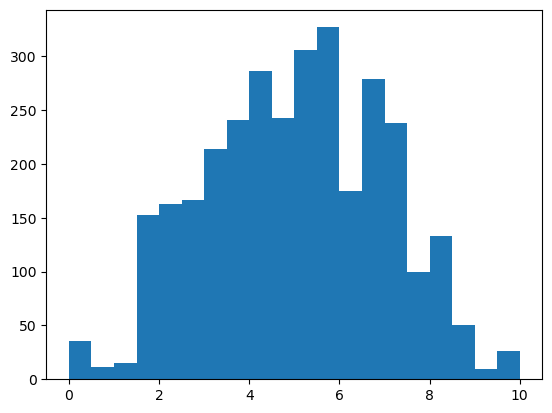

In [91]:
# some preliminary exploration how sector and score are correlated? 
# look at score spread - fairly normally distributed 
import matplotlib.pyplot as plt
plt.hist(public_us_scores["Overall ESG SCORE"], bins = 20)

(array([ 63.,  50.,  74.,  58.,  80., 141., 137., 133., 178., 184., 191.,
        226., 152., 190., 105., 211., 336., 146., 112.,  49., 114.,  35.,
         44.,  13., 151.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. ]),
 <BarContainer object of 25 artists>)

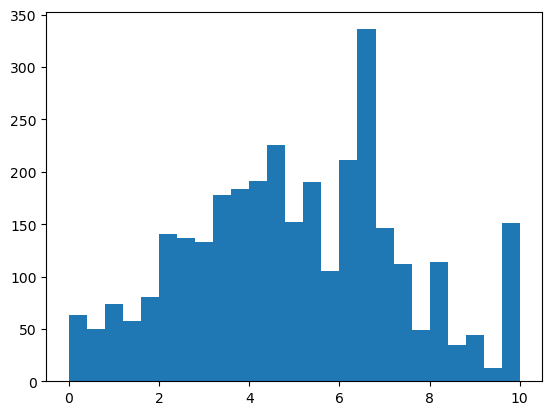

In [93]:
# by subcategory? - environment
plt.hist(public_us_scores["Environmental SCORE"], bins = 25)

(array([  8.,  16.,  24.,  23.,  64., 123., 138., 170., 279., 320., 359.,
        456., 229., 330., 161., 162., 137.,  67.,  44.,  20.,  19.,   8.,
         10.,   1.,   5.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. ]),
 <BarContainer object of 25 artists>)

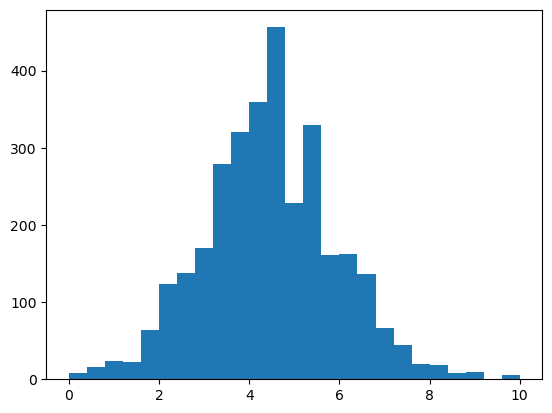

In [97]:
# by subcategory? - social (tiny bit right skewed but think it's ok)
plt.hist(public_us_scores["Social SCORE"], bins = 25)
# should i look at summary stats too

(array([  1.,   1.,   4.,   7.,   1.,  13.,  17.,  21.,  65.,  78.,  85.,
        151., 177., 339., 301., 379., 461., 361., 300., 236., 102.,  46.,
         24.,   1.,   2.]),
 array([0.   , 0.336, 0.672, 1.008, 1.344, 1.68 , 2.016, 2.352, 2.688,
        3.024, 3.36 , 3.696, 4.032, 4.368, 4.704, 5.04 , 5.376, 5.712,
        6.048, 6.384, 6.72 , 7.056, 7.392, 7.728, 8.064, 8.4  ]),
 <BarContainer object of 25 artists>)

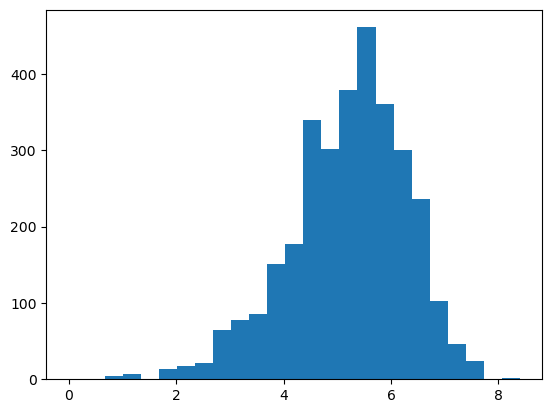

In [98]:
# by subcategory - governance (this one's a bit left skewed)
plt.hist(public_us_scores["Governance SCORE"], bins = 25)

# so ... seems like overall pretty normal, some generally governance scores are high
# bt e, s (especially s) are a bit lower 

In [ ]:
# how does this change by industry?